### **Assignment on Classification**

In [224]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

Do the following in the iris dataset
1. Read the dataset to python environment

In [225]:
iris_data = pd.read_excel('/content/iris (1).xls')
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


2. Do the necessary pre-processing steps

In [226]:
# Understanding the dataset
print(iris_data.head())
print(iris_data.info())
print(iris_data.isna().sum())

    SL   SW   PL   PW Classification
0  5.1  3.5  1.4  0.2    Iris-setosa
1  4.9  3.0  1.4  0.2    Iris-setosa
2  NaN  3.2  1.3  0.2    Iris-setosa
3  4.6  3.1  1.5  0.2    Iris-setosa
4  5.0  3.6  1.4  0.2    Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64


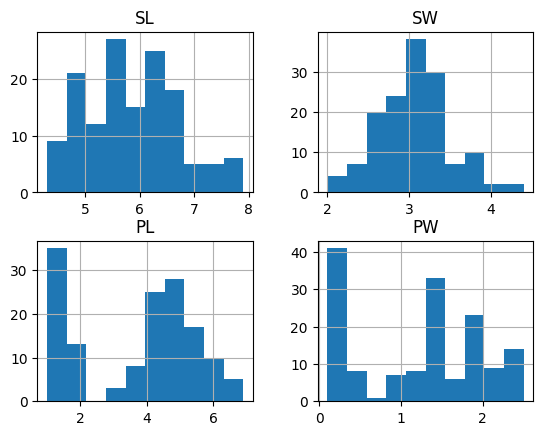

In [227]:
numeric_data = iris_data.select_dtypes('float64')
numeric_data.hist()
plt.show()

Handling missing values

In [228]:
# Impute missing values with mean
iris_data['SL'].fillna(iris_data['SL'].median(), inplace=True)
iris_data['SW'].fillna(iris_data['SW'].median(), inplace=True)
iris_data['PL'].fillna(iris_data['PL'].median(), inplace=True)

In [229]:
iris_data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Handling outliers

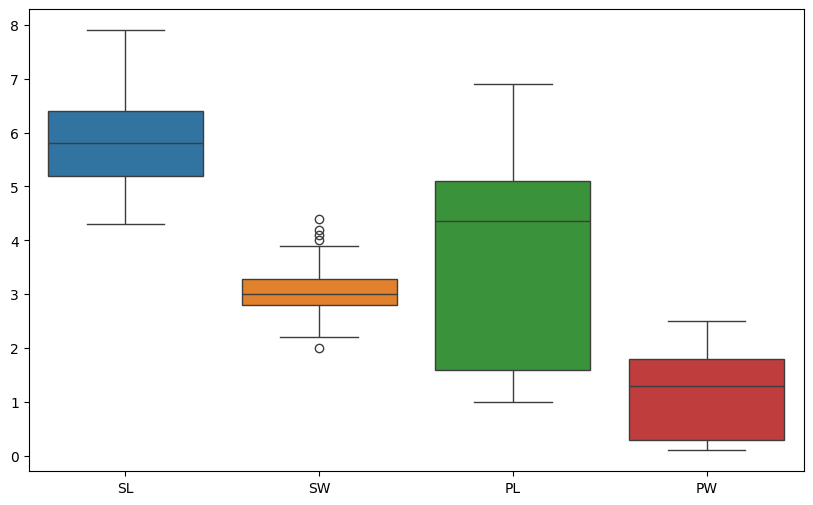

In [230]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_data)
plt.show()

In [231]:
# SW column contains outliers;  finding the outliers using IQR method and then clipping those values
Q1=np.percentile(iris_data['SW'],25,method='midpoint')
Q2=np.percentile(iris_data['SW'],50,method='midpoint')
Q3=np.percentile(iris_data['SW'],75,method='midpoint')

print('Q1 is  ',Q1)
print('Q2 is  ', Q2)
print('Q3 is  ', Q3)

IQR = Q3-Q1
print('IQR is :', IQR)

lower_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR

print('lower whisker is ',lower_lim)
print('upper whisker is ',Up_lim)

outlier=[]
for x in iris_data['SW']:
  if( (x < lower_lim) or (x > Up_lim)):
    outlier.append(x)
print('Outliers are: ', outlier)

Q1 is   2.8
Q2 is   3.0
Q3 is   3.25
IQR is : 0.4500000000000002
lower whisker is  2.1249999999999996
upper whisker is  3.9250000000000003
Outliers are:  [4.0, 4.4, 4.1, 4.2, 2.0]


In [232]:
# Using the clip function
iris_data['SW']=iris_data['SW'].clip(lower=lower_lim, upper=Up_lim)
outlier=[]
for x in iris_data['SW']:
  if( (x < lower_lim) or (x > Up_lim)):
    outlier.append(x)
print(outlier)

[]


<Axes: >

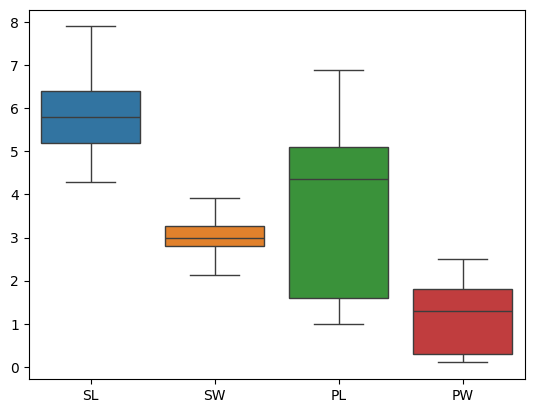

In [233]:
sns.boxplot(iris_data)

Label Encoding

In [234]:
# applying label encoding to the target variable
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
iris_data['Classification'] = le.fit_transform(iris_data['Classification'])
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


Correlation

<Axes: >

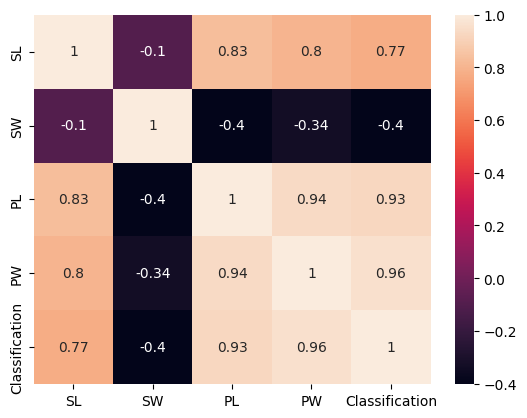

In [235]:
sns.heatmap(iris_data.corr(), annot = True)

In [236]:
# There is a strong correlation between PLand PW
# Therefore  one can be dropped

iris_data.drop(['PL'],axis = 1, inplace = True)

<Axes: >

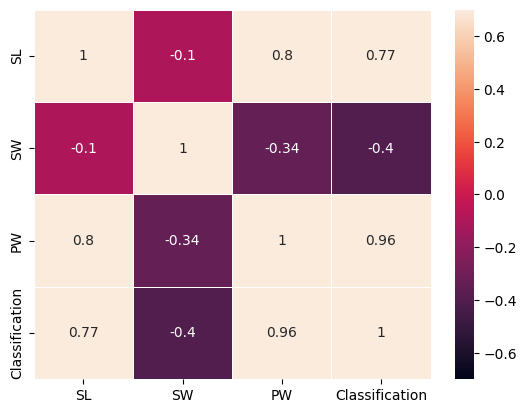

In [237]:
sns.heatmap(iris_data.corr(), vmin = -0.7, vmax = 0.7, linewidths = 0.5, annot = True)

3. Find out which classification model gives the best result

In [238]:
# Separate target and feature variables

y = iris_data['Classification']
x = iris_data.drop(['Classification'], axis = 1)

In [239]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = .2)

### **Logistic regression**

In [240]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

LogisticRegression()

In [241]:
y_pred = logistic_regression_model.predict(x_test)

In [242]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [243]:
# Evaluate the model
print('accuracy =', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred, average='weighted'))
print('recall =', recall_score(y_test, y_pred, average='weighted'))
print('f1 =', f1_score(y_test, y_pred, average='weighted'))

accuracy = 1.0
precision = 1.0
recall = 1.0
f1 = 1.0


### **k-NN**

In [244]:
from sklearn.neighbors import KNeighborsClassifier
metric_k =[]
neighbors = np.arange(3,15)

In [245]:
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski', p =2)
  classifier.fit(x_train, y_train)
  y_pred_knn = classifier.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'Accuracy')

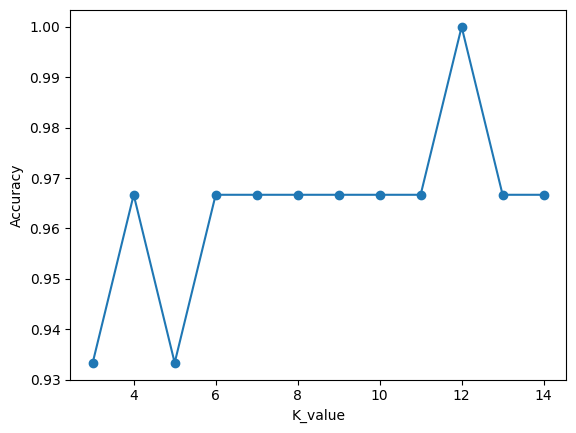

In [246]:
# plotting a line graph showing the relationship between the number of neighbors (k) and the corresponding accuracy

plt.plot(neighbors, metric_k, 'o-' )
plt.xlabel('K_value')
plt.ylabel('Accuracy')

In [247]:
classifier= KNeighborsClassifier(n_neighbors=8,metric='minkowski', p =2)
classifier.fit(x_train, y_train)
y_pred_knn = classifier.predict(x_test)

In [248]:
print('Accuracy :',accuracy_score(y_test,y_pred_knn))
print('Precision :',precision_score(y_test,y_pred_knn, average = 'weighted'))
print('recall :',recall_score(y_test,y_pred_knn, average = 'weighted'))
print('F1 :',f1_score(y_test,y_pred_knn, average = 'weighted'))

Accuracy : 0.9666666666666667
Precision : 0.9694444444444444
recall : 0.9666666666666667
F1 : 0.9664109121909632


### **SVM Model**

In [249]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [250]:
y_pred_svm = svm_classifier.predict(x_test)

In [251]:
print(confusion_matrix(y_test,y_pred_svm))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [252]:
print('Accuracy :',accuracy_score(y_test,y_pred_svm))
print('Precision :',precision_score(y_test,y_pred_svm, average = 'weighted'))
print('recall :',recall_score(y_test,y_pred_svm, average = 'weighted'))
print('F1 :',f1_score(y_test,y_pred_svm, average = 'weighted'))

Accuracy : 0.9666666666666667
Precision : 0.9694444444444444
recall : 0.9666666666666667
F1 : 0.9664109121909632


### **Decision Tree**

In [253]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [254]:
y_pred_dt = decision_tree_model.predict(x_test)

In [255]:
print(confusion_matrix(y_test,y_pred_dt))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [256]:
print('Accuracy :',accuracy_score(y_test,y_pred_dt))
print('Precision :',precision_score(y_test,y_pred_dt, average = 'weighted'))
print('recall :',recall_score(y_test,y_pred_dt, average = 'weighted'))
print('F1 :',f1_score(y_test,y_pred_dt, average = 'weighted'))

Accuracy : 0.9666666666666667
Precision : 0.9694444444444444
recall : 0.9666666666666667
F1 : 0.9664109121909632


### **Random Forest**

In [257]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=None, criterion='entropy', min_samples_split=2)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [258]:
y_pred_rf = rf_classifier.predict(x_test)

In [259]:
print(confusion_matrix(y_test,y_pred_rf))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [260]:
print('Accuracy :',accuracy_score(y_test,y_pred_rf))
print('Precision :',precision_score(y_test,y_pred_rf, average = 'weighted'))
print('recall :',recall_score(y_test,y_pred_rf, average = 'weighted'))
print('F1 :',f1_score(y_test,y_pred_rf, average = 'weighted'))

Accuracy : 0.9666666666666667
Precision : 0.9694444444444444
recall : 0.9666666666666667
F1 : 0.9664109121909632


In [261]:
from sklearn.model_selection import cross_val_score

# Define a list of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
    results[name] = scores.mean(), scores.std()

# Print average performance of each model
for name, (mean_score, std_score) in results.items():
    print(f'{name}: Mean Accuracy = {mean_score}, Std Accuracy = {std_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Mean Accuracy = 0.9499999999999998, Std Accuracy = 0.10000000000000002
Decision Tree: Mean Accuracy = 0.8999999999999998, Std Accuracy = 0.12247448713915893
Random Forest: Mean Accuracy = 0.9333333333333332, Std Accuracy = 0.09718253158075502
SVM: Mean Accuracy = 0.9333333333333333, Std Accuracy = 0.0816496580927726
KNN: Mean Accuracy = 0.9499999999999998, Std Accuracy = 0.055277079839256664


Logistic Regression and KNN models have the highest mean accuracy of approximately 0.95, indicating that they perform well on average across different folds.
Decision Tree has a slightly lower mean accuracy of around 0.90, but it still performs reasonably well.
Random Forest and SVM models also have high mean accuracies, close to 0.93. Overall, Logistic Regression and KNN still appear to be the most reliable models.